In [2]:
import numpy as np

In [3]:
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense
from keras.models import Sequential

# Images fed into this model are 512 x 512 pixels with 3 channels
img_shape = (28,28,1)

# Set up model
model = Sequential()

# Add convolutional layer with 3, 3 by 3 filters and a stride size of 1
# Set padding so that input size equals output size
model.add(Conv2D(6,3,input_shape=img_shape))
# Add relu activation to the layer 
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Conv2D(12,3))

model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10))

model.add(Activation('softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 12)        660       
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 12)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 300)               0         
__________

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [6]:
from keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train = np.expand_dims(x_train,-1)

In [10]:
x_test = np.expand_dims(x_test,-1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
y_train.shape

(60000,)

In [44]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 309us/step - loss: 5.3931 - acc: 0.6464 - val_loss: 1.9519 - val_acc: 0.8542
Epoch 2/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.8855 - acc: 0.9136 - val_loss: 0.1279 - val_acc: 0.9635
Epoch 3/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.1078 - acc: 0.9699 - val_loss: 0.0999 - val_acc: 0.9704
Epoch 4/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0840 - acc: 0.9752 - val_loss: 0.0779 - val_acc: 0.9796
Epoch 5/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.0721 - acc: 0.9774 - val_loss: 0.0727 - val_acc: 0.9758
Epoch 6/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0624 - acc: 0.9808 - val_loss: 0.0678 - val_acc: 0.9796
Epoch 7/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0557 - acc: 0.9824 - val_loss: 0.

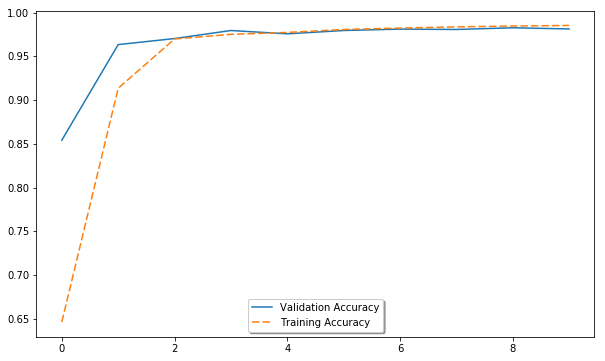

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()

In [29]:
history.history

{'acc': [0.78751666666666664,
  0.96399999999999997,
  0.9745166666666667,
  0.97828333333333328,
  0.98121666666666663],
 'loss': [2.6721490326330066,
  0.12396917544280489,
  0.083889094699057754,
  0.069084088668506599,
  0.059164642429499266],
 'val_acc': [0.95669999999999999,
  0.97409999999999997,
  0.97589999999999999,
  0.9728,
  0.97960000000000003],
 'val_loss': [0.14562211257070304,
  0.084075064436299723,
  0.077148702734848487,
  0.092111060906387862,
  0.071722510480089111]}

## Regularization

In [23]:
from keras.regularizers import l2

# Set up model
model = Sequential()

# Add convolutional layer with 3, 3 by 3 filters and a stride size of 1
# Set padding so that input size equals output size
model.add(Conv2D(6,3,input_shape=img_shape, kernel_regularizer=l2(0.01)))
# Add relu activation to the layer 
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Conv2D(12,3,activity_regularizer=l2(0.01)))

model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [25]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 374us/step - loss: 7707.2773 - acc: 0.6556 - val_loss: 55.7280 - val_acc: 0.7322
Epoch 2/10
60000/60000 [==============================] - 21s 344us/step - loss: 20.5613 - acc: 0.7088 - val_loss: 6.1601 - val_acc: 0.6771
Epoch 3/10
60000/60000 [==============================] - 19s 323us/step - loss: 3.6656 - acc: 0.6576 - val_loss: 2.3230 - val_acc: 0.6651
Epoch 4/10
60000/60000 [==============================] - 20s 335us/step - loss: 1.9728 - acc: 0.6883 - val_loss: 1.7181 - val_acc: 0.7354
Epoch 5/10
60000/60000 [==============================] - 21s 343us/step - loss: 1.5655 - acc: 0.7618 - val_loss: 1.4479 - val_acc: 0.7945
Epoch 6/10
60000/60000 [==============================] - 19s 323us/step - loss: 1.3464 - acc: 0.8130 - val_loss: 1.5671 - val_acc: 0.7855
Epoch 7/10
60000/60000 [==============================] - 19s 322us/step - loss: 1.2079 - acc: 0.8388 - val_los

# Dropout

In [26]:
from keras.layers import Dropout


model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [28]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 371us/step - loss: 5.6472 - acc: 0.6039 - val_loss: 0.2495 - val_acc: 0.9265
Epoch 2/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.2920 - acc: 0.9104 - val_loss: 0.1253 - val_acc: 0.9627
Epoch 3/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.1891 - acc: 0.9406 - val_loss: 0.0819 - val_acc: 0.9753
Epoch 4/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.1551 - acc: 0.9514 - val_loss: 0.0730 - val_acc: 0.9782
Epoch 5/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.1367 - acc: 0.9574 - val_loss: 0.0728 - val_acc: 0.9767
Epoch 6/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.1245 - acc: 0.9609 - val_loss: 0.0690 - val_acc: 0.9775
Epoch 7/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.1178 - acc: 0.9629 - val_loss: 0.

In [29]:
from keras.layers import BatchNormalization


model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [30]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [31]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.2229 - acc: 0.9328 - val_loss: 0.0775 - val_acc: 0.9768
Epoch 2/10
60000/60000 [==============================] - 26s 429us/step - loss: 0.0744 - acc: 0.9766 - val_loss: 0.0668 - val_acc: 0.9795
Epoch 3/10
60000/60000 [==============================] - 25s 419us/step - loss: 0.0587 - acc: 0.9820 - val_loss: 0.0569 - val_acc: 0.9819
Epoch 4/10
60000/60000 [==============================] - 26s 428us/step - loss: 0.0495 - acc: 0.9845 - val_loss: 0.0544 - val_acc: 0.9835
Epoch 5/10
60000/60000 [==============================] - 26s 427us/step - loss: 0.0450 - acc: 0.9857 - val_loss: 0.0528 - val_acc: 0.9830
Epoch 6/10
60000/60000 [==============================] - 29s 492us/step - loss: 0.0404 - acc: 0.9870 - val_loss: 0.0509 - val_acc: 0.9839
Epoch 7/10
60000/60000 [==============================] - 29s 480us/step - loss: 0.0378 - acc: 0.9880 - val_loss: 0.

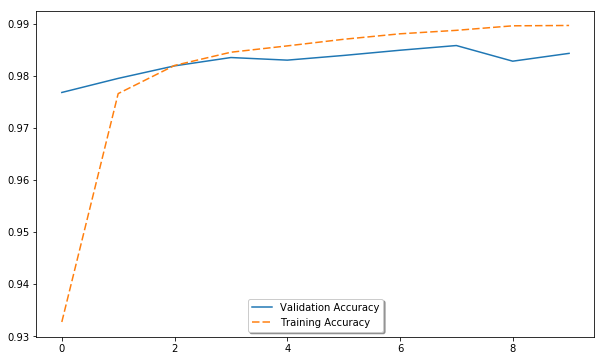

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()